<a href="https://colab.research.google.com/github/gayatrik1802/Cancer-Cell-Detection/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://lh5.googleusercontent.com/-teIGM5EkaD8giL22Fj0W_hUnHejCjdEsjAcHppTwUgpHAOdHDQtz_aWKBPzMM5WbPBjn0R-4OhPQKw-R6wJpDYA3OvRFYlbbA98_5vRgqUQJqTSwOCBwZfOOGx5HD6rfQ=w1280" width="5300">




<font size="4"> <p>Cancer cell detection is a critical application of medical imaging and artificial intelligence, aimed at improving early diagnosis and treatment. This project leverages machine learning techniques to identify cancerous cells in medical images accurately.</p></font>





# **1. Importing Essential Libraries**

The code imports several libraries required for data handling, visualization.

   1) *** Data Manipulation and Analysis ***

*   numpy is used for handling arrays, mathematical operations, and tensor manipulations.
*   pandas is useful for loading, storing, and structuring tabular data.

2)*** Data Visualization ***

*   seaborn provides high-level statistical plots.
*   matplotlib.pyplot allows creating graphs, histograms, and image visualizations.

3)*** File Handling and Image Processing ***

*  os is used to interact with the file system (e.g., reading directory names).
*  glob helps in retrieving file paths based on specific patterns (e.g., *.jpg).
*   PIL.Image (Pillow library) is used for loading and preprocessing images.

4)*** TensorFlow & Keras for Deep Learning ***
*   tensorflow is the deep learning framework used for training and deploying neural networks.
*   keras (which is part of TensorFlow) provides an easier API for building models.
*   layers is used to create various neural network layers like convolutional, dense, dropout, etc.

5) *** Optimization & Performance Tuning ***
*  functools.partial is used to create reusable functions with pre-set parameters.
*   tf.data.AUTOTUNE automatically optimizes the data pipeline, improving training efficiency.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import nbformat
import matplotlib.pyplot as plt
import os

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

AUTO = tf.data.AUTOTUNE  # Updated AUTO, optimize the performance of data pipelines when working with TensorFlow's

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive to access files stored in the user's Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Benign vs Malignant Cells in the Dataset**

This dataset consists of images of cancer cells, categorized into two main types:

1.Benign Cells (Non-Cancerous) 🟢

2.Malignant Cells (Cancerous) 🔴

# **Benign Cells (Non-Cancerous) :**
Benign cells are non-cancerous cells.
They do not invade nearby tissues or spread to other parts of the body.
These cells grow slowly and have well-defined borders.

***Characteristics of Benign cells images :***


*   Uniform shape and size
*   Clear, smooth boundaries
*   Do not show signs of aggressive growth

# **Malignant Cells (Cancerous) :**
Malignant cells are cancerous and can invade nearby tissues.
They grow rapidly and uncontrollably.These cells can spread (metastasize) to other parts of the body.

***Characteristics of Malignant cells images :***


*   Irregular shape and size
*   Blurred or undefined boundaries
*   Clusters of abnormal cells indicating aggressive growth









In [ ]:
# Load dataset
# Retrieve all image file paths from the dataset directory
image_paths = glob('/content/drive/MyDrive/cancer_cells/*/*.jpg')
# Print the total number of images found
print(f"Total images found: {len(image_paths)}")

Total images found: 527


# **Data Preparation and Label Processing for Cancer Cell Classification**
This code prepares the dataset by formatting file paths, organizing them into a structured DataFrame, extracting labels from directory names, and converting them into numerical values for machine learning.

**1. Ensuring Correct File Path Format**

**2. Creating a Pandas DataFrame to Store Image Information**

**3. Extracting Labels from Folder Names**

**4. Converting Labels to Binary Values**

**5. Displaying the First Few Rows for Verification**

In [ ]:
# Ensure paths are correctly formatted
image_paths = [path.replace('\\', '/') for path in image_paths]

# Create DataFrame
df = pd.DataFrame({'filepath': image_paths})

# Extract label from the directory name
df['label'] = df['filepath'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Convert labels to binary (0: benign, 1: malignant)
df['label_bin'] = df['label'].map({'benign': 0, 'malignant': 1})

# Display first few rows
print(df.head())

                                            filepath   label  label_bin
0  /content/drive/MyDrive/cancer_cells/benign/34.jpg  benign          0
1   /content/drive/MyDrive/cancer_cells/benign/4.jpg  benign          0
2  /content/drive/MyDrive/cancer_cells/benign/28.jpg  benign          0
3  /content/drive/MyDrive/cancer_cells/benign/25.jpg  benign          0
4  /content/drive/MyDrive/cancer_cells/benign/12.jpg  benign          0


In [ ]:
# Ensure paths are correctly formatted
image_paths = [path.replace('\\', '/') for path in image_paths]

# Create pandas DataFrame
df = pd.DataFrame({'filepath': image_paths})

# Extract label from the directory name
df['label'] = df['filepath'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Show first few rows
print(df.head())

                                            filepath   label
0  /content/drive/MyDrive/cancer_cells/benign/34.jpg  benign
1   /content/drive/MyDrive/cancer_cells/benign/4.jpg  benign
2  /content/drive/MyDrive/cancer_cells/benign/28.jpg  benign
3  /content/drive/MyDrive/cancer_cells/benign/25.jpg  benign
4  /content/drive/MyDrive/cancer_cells/benign/12.jpg  benign


In [ ]:
# Convert labels to binary (0: benign, 1: malignant)
df['label_bin'] = df['label'].map({'benign': 0, 'malignant': 1})

# Show updated DataFrame
print(df.head())

                                            filepath   label  label_bin
0  /content/drive/MyDrive/cancer_cells/benign/34.jpg  benign          0
1   /content/drive/MyDrive/cancer_cells/benign/4.jpg  benign          0
2  /content/drive/MyDrive/cancer_cells/benign/28.jpg  benign          0
3  /content/drive/MyDrive/cancer_cells/benign/25.jpg  benign          0
4  /content/drive/MyDrive/cancer_cells/benign/12.jpg  benign          0


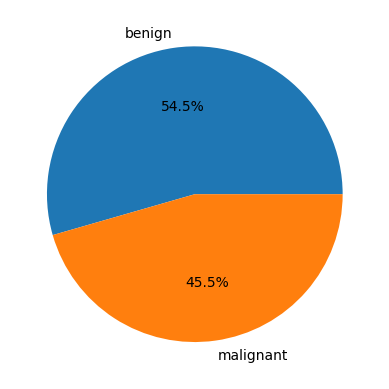

In [ ]:
#CREARTING A PIE CHART
#calculating the frequency of each label
x = df['label'].value_counts()
#creating a pie chart
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')# this formats the numerical labels
plt.show()

# Displaying images from the Dataframe

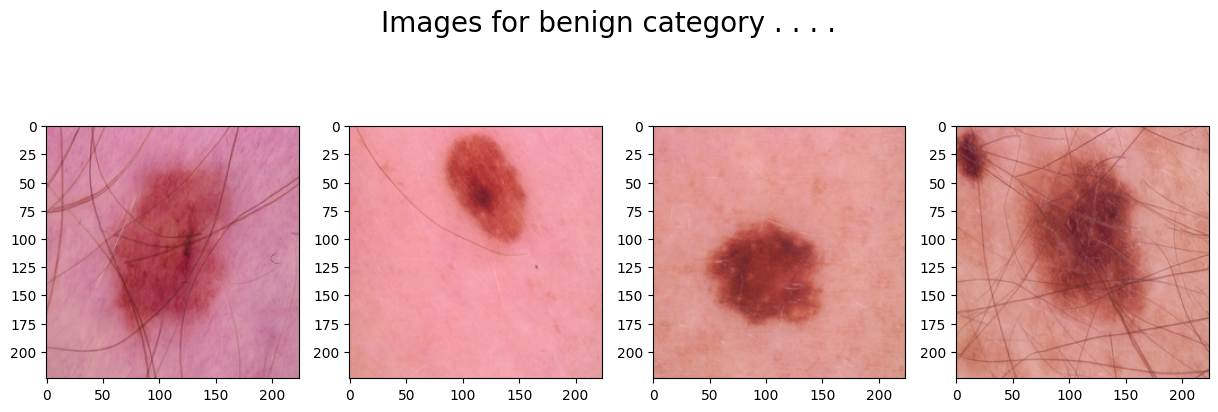

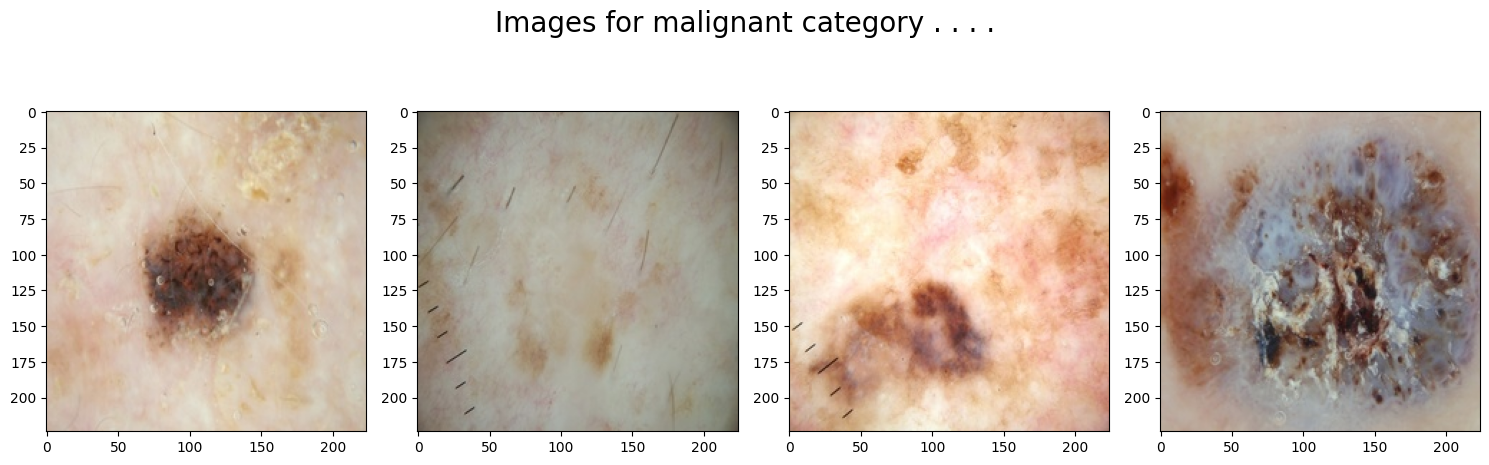

In [ ]:
#outer loop which iterates through each unique value in the label column of the dataframe.
for cell in df['label'].unique():
  #filtering dataframe and creating temporary dataframe called temp.
    temp = df[df['label'] == cell]
#getting image indices
    index_list = temp.index
    #creating subplots
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    #setting tittle
    fig.suptitle(f'Images for {cell} category . . . .', fontsize=20)
    #inner loop displaying images
    for i in range(4):
        index = np.random.randint(0, len(index_list))
        index = index_list[index]
        #retrives entire row of data from the original dataframe.
        data = df.iloc[index]
#extracts the file path of the image from the data row
        image_path = data[0]
#opens image using PTL library, converts it to a numpy array and stores it in the image variable.
        img = np.array(Image.open(image_path))
        #line displays the image in the i-th subplot of the figure
        ax[i].imshow(img)
        #adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

Data preparation for machine learning

In [ ]:
#feature and target selection
features = df['filepath']
target = df['label_bin']
#data splitting
X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.15,
                                      random_state=10)

X_train.shape, X_val.shape

((447,), (80,))

In [ ]:
def decode_image(filepath, label=None):

    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [224, 224])
    img = tf.cast(img, tf.float32) / 255.0

    # Compare label with integer 0 or 1 instead of string
    if label == 0:
        Label = 0
    else:
        Label = 1

    return img, Label

In [ ]:
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7

pre_trained_model = EfficientNetB7(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

for layer in pre_trained_model.layers:
    layer.trainable = False

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Split dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label_bin'])

# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='filepath', y_col='label_bin', target_size=(150, 150),
    batch_size=32, class_mode='raw')

val_generator = val_datagen.flow_from_dataframe(
    val_df, x_col='filepath', y_col='label_bin', target_size=(150, 150),
    batch_size=32, class_mode='raw')

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Function to classify new images
def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return "Malignant" if prediction > 0.5 else "Benign"

Found 421 validated image filenames.
Found 106 validated image filenames.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.5291 - loss: 2.7444 - val_accuracy: 0.7170 - val_loss: 0.6201
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6458 - loss: 0.6014 - val_accuracy: 0.7453 - val_loss: 0.5163
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7394 - loss: 0.5446 - val_accuracy: 0.7642 - val_loss: 0.4267
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7882 - loss: 0.4275 - val_accuracy: 0.8962 - val_loss: 0.2969
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8306 - loss: 0.4376 - val_accuracy: 0.8585 - val_loss: 0.3059
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8356 - loss: 0.3374 - val_accuracy: 0.6509 - val_loss: 0.6353
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8172 - loss: 0.3923 - val_accuracy: 0.8113 - val_loss: 0.3314
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s

In [ ]:
def decode_image(filepath, label=None):

    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [150, 150]) # Resize to match model input shape
    img = tf.cast(img, tf.float32) / 255.0

    # Compare label with integer 0 or 1 instead of string
    if label == 0:
        Label = 0
    else:
        Label = 1

    return img, Label

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.548694,1.887052,0.716981,0.620062
1,0.674584,0.583428,0.745283,0.516318
2,0.762470,0.512604,0.764151,0.426717
3,0.781473,0.476465,0.896226,0.296932
4,0.831354,0.416886,0.858491,0.305862


In [ ]:
def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return "Malignant" if prediction > 0.5 else "Benign"

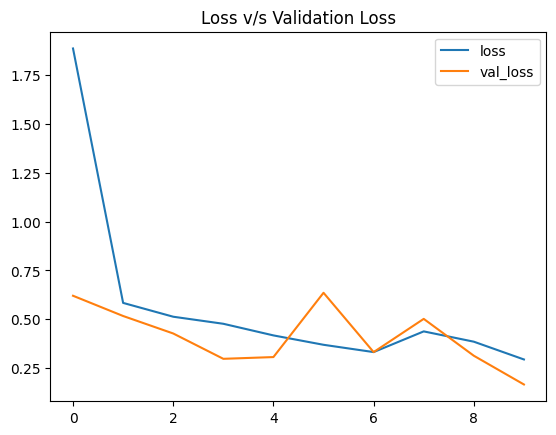

In [ ]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


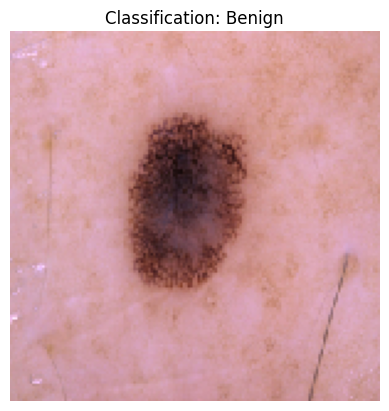

Benign


In [ ]:
# Plot the image with classification result
def plot_classification(img_path, result):
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Classification: {result}')
    plt.show()
imgpath = "/content/drive/MyDrive/cancer_cells/benign/100.jpg"
result = classify_image(imgpath, model)
plot_classification(imgpath, result)
print(result)